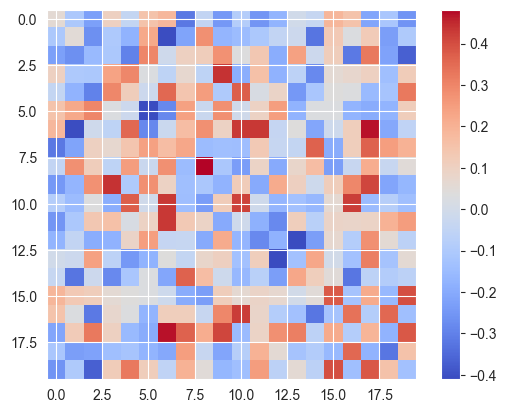

In [5]:

import numpy as np
import matplotlib.pyplot as plt

def display_table(table):
    # Display the matrix using a colormap
    plt.imshow(table, cmap='coolwarm', interpolation='nearest')
    plt.colorbar()  # Add a color scale
    plt.show()

size = 20
linkage_table = np.random.random((20, 20))
linkage_table += linkage_table.T
linkage_table -= 1
linkage_table /=2

display_table(linkage_table)


In [7]:
def rearrange_table(table, new_order):
    return table[new_order, :][:, new_order]

In [26]:


def find_cleaner_arrangement(table):
    remaining_rows = list(range(table.shape[0]))
    
    picked_rows = [0]
    remaining_rows.remove(0)
    
    def get_distance_between_rows(row_a, row_b):
        return np.sum(np.abs(table[row_a] - table[row_b]))
    
    def distance_from_last_row(row):
        return get_distance_between_rows(row, picked_rows[-1])
    
    while (remaining_rows):
        picked = min(remaining_rows, key=distance_from_last_row)
        picked_rows.append(picked)
        remaining_rows.remove(picked)
        
    return picked_rows


def make_cleaner_table(table):
    cleaner_arrangement = find_cleaner_arrangement(table)
    print(f"The new arrangement is {cleaner_arrangement}")
    return rearrange_table(table, cleaner_arrangement)




In [28]:
import utils


def find_cleaner_arrangement_with_restriction(table, start_from):
    remaining_rows = list(range(table.shape[0]))
    
    picked_rows = [start_from]
    remaining_rows.remove(start_from)
    
    def get_distance_between_rows(row_a, row_b):
        return np.sum(np.abs(table[row_a] - table[row_b]))
    
    def distance_from_last_row(row):
        return get_distance_between_rows(row, picked_rows[-1])
    
    while (remaining_rows):
        picked = min(remaining_rows, key=distance_from_last_row)
        picked_rows.append(picked)
        remaining_rows.remove(picked)
        
    total_penalty = sum(get_distance_between_rows(a, b) for a, b in zip(picked_rows, picked_rows[1:]+[start_from]))
        
    return picked_rows, total_penalty


def select_best_arrangement_from_many(table):
    all_arrangements = [find_cleaner_arrangement_with_restriction(table, start) for start in range(table.shape[0])]
    for arrange, score in all_arrangements:
        print(arrange, " ", score)
    best = min(all_arrangements, key=utils.second)
    return best[0]


def clean_table(table):
    best_arrangement = select_best_arrangement_from_many(table)
    return rearrange_table(table, best_arrangement)

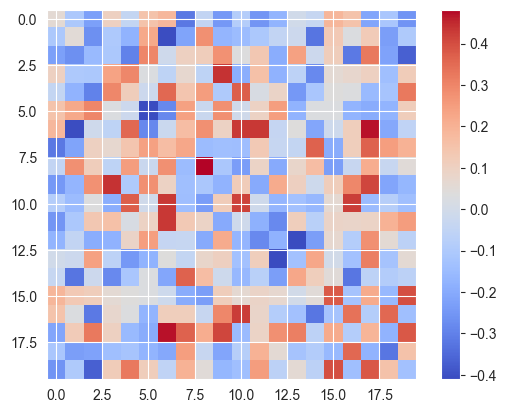

[0, 1, 12, 3, 19, 7, 11, 4, 10, 16, 18, 5, 15, 13, 8, 14, 2, 9, 17, 6]   77.68048315382332
[1, 0, 11, 7, 19, 3, 12, 2, 14, 13, 8, 15, 5, 18, 4, 10, 16, 6, 9, 17]   76.85648785731671
[2, 14, 13, 8, 7, 11, 0, 1, 12, 3, 19, 15, 5, 18, 4, 10, 16, 6, 9, 17]   76.54263691425132
[3, 12, 1, 0, 11, 7, 19, 2, 14, 13, 8, 15, 5, 18, 4, 10, 16, 6, 9, 17]   76.08992556055117
[4, 11, 7, 19, 3, 12, 1, 0, 9, 2, 14, 13, 8, 15, 5, 18, 16, 10, 6, 17]   75.7424825950466
[5, 15, 13, 8, 7, 11, 0, 1, 12, 3, 19, 2, 14, 18, 4, 10, 16, 6, 9, 17]   75.09223994106561
[6, 3, 12, 1, 0, 11, 7, 19, 2, 14, 13, 8, 15, 5, 18, 4, 10, 16, 9, 17]   77.13488811954781
[7, 11, 0, 1, 12, 3, 19, 2, 14, 13, 8, 15, 5, 18, 4, 10, 16, 6, 9, 17]   76.85570326962586
[8, 13, 15, 5, 18, 4, 11, 7, 19, 3, 12, 1, 0, 9, 2, 14, 10, 16, 6, 17]   76.08678832781581
[9, 0, 1, 12, 3, 19, 7, 11, 4, 10, 16, 18, 5, 15, 13, 8, 14, 2, 6, 17]   75.99517998724525
[10, 16, 3, 12, 1, 0, 11, 7, 19, 2, 14, 13, 8, 15, 5, 18, 4, 6, 9, 17]   77.80070808316225


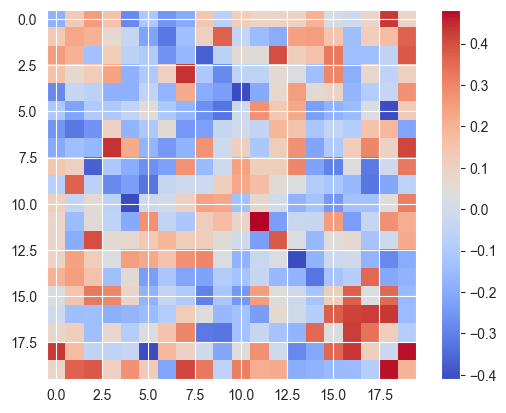

In [29]:


display_table(linkage_table)
display_table(clean_table(linkage_table))